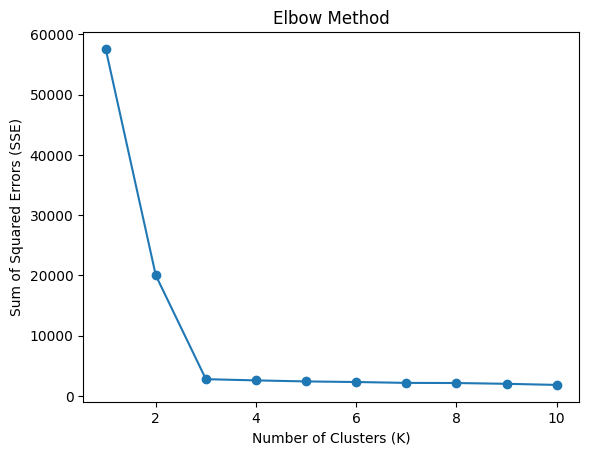

Silhouette Score: 0.31967314653250944


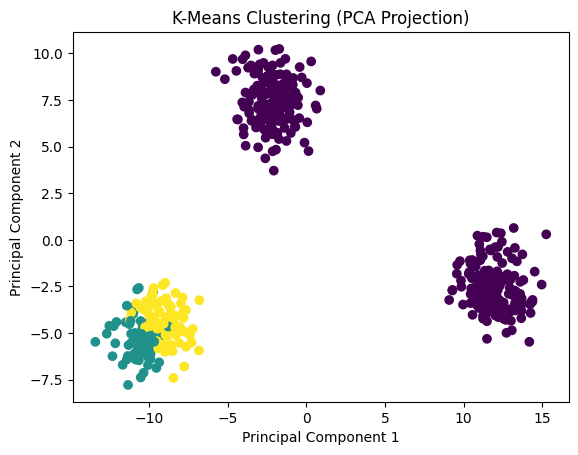

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA


# 1. Generate Synthetic Dataset (4D data)
np.random.seed(42)

X, _ = make_blobs(
    n_samples=500,
    centers=3,
    n_features=4,
    cluster_std=1.2
)


# 2. K-Means From Scratch (NO arguments)

class KMeansFromScratch:

    def _init_(self):
        pass

    def fit(self, X, k, max_iters=100):
        self.k = k
        n_samples = X.shape[0]

        # Random centroid initialization
        random_idx = np.random.choice(n_samples, k, replace=False)
        self.centroids = X[random_idx]

        for _ in range(max_iters):
            self.labels_ = self._assign_clusters(X)
            old_centroids = self.centroids.copy()

            # Update centroids
            self.centroids = np.array([
                X[self.labels_ == i].mean(axis=0)
                for i in range(k)
            ])

            # Stop if converged
            if np.all(old_centroids == self.centroids):
                break

    def _assign_clusters(self, X):
        distances = np.linalg.norm(
            X[:, np.newaxis] - self.centroids, axis=2
        )
        return np.argmin(distances, axis=1)



# 3. Elbow Method (SSE / WCSS)
def calculate_sse(X, labels, centroids):
    sse = 0
    for i in range(len(centroids)):
        sse += np.sum((X[labels == i] - centroids[i]) ** 2)
    return sse

sse_values = []
K_range = range(1, 11)

for k in K_range:
    model = KMeansFromScratch()
    model.fit(X, k)
    sse_values.append(
        calculate_sse(X, model.labels_, model.centroids)
    )

# Plot Elbow Curve
plt.figure()
plt.plot(K_range, sse_values, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Sum of Squared Errors (SSE)")
plt.title("Elbow Method")
plt.show()


# 4. Final Clustering with Optimal K

optimal_k = 3
kmeans = KMeansFromScratch()
kmeans.fit(X, optimal_k)

# Silhouette Score
sil_score = silhouette_score(X, kmeans.labels_)
print("Silhouette Score:", sil_score)


# 5. PCA Visualization (4D → 2D)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure()
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_)
plt.title("K-Means Clustering (PCA Projection)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()